In [1]:
import numpy as np
import pandas as pd
import string
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt

In [2]:
# Same parameters Rauber used
classes=10
dims=100
class_size=200
variance=0.1
steps=10
advection_ratio=0.5
random_state=0    

In [3]:
random_state = check_random_state(random_state)
X = []

indices = random_state.permutation(dims)[0:classes]
means = []
for c in range(classes):
    mean = np.zeros(dims)
    mean[indices[c]] = 1.0
    means.append(mean)

    X.append(random_state.multivariate_normal(mean, np.eye(dims)*variance,
                                              class_size))

In [4]:
means

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [5]:
X = np.concatenate(X)
y = np.concatenate([[i]*class_size for i in range(classes)])

In [6]:
X[0]

array([  1.34521204e-01,  -8.84526486e-03,   4.66748967e-01,
         2.04529825e-01,  -1.15212626e-01,  -2.14648257e-01,
        -1.11826947e-01,  -2.34244918e-01,  -2.13460646e-01,
        -4.19900687e-02,   1.95998306e-01,   5.66417201e-01,
         5.40750865e-02,  -5.45705196e-01,   5.08046913e-02,
        -2.71635009e-01,  -6.52760335e-02,   1.54454011e-01,
        -2.65103528e-01,   1.20534559e-01,  -3.13351131e-01,
         3.21881934e-01,   1.08019419e-01,  -3.95564954e-01,
         2.92589978e-01,  -2.86118506e-01,   1.58302645e+00,
         4.82407746e-01,  -4.57118488e-01,   1.19268657e-01,
        -2.23121550e-02,   1.91052074e-01,   1.49306623e-01,
         2.59280614e-01,   2.86982901e-01,  -1.85253459e-01,
         2.96482138e-01,  -8.05141481e-02,   3.07878946e-01,
         6.55485681e-02,   3.47737324e-01,   2.97221523e-01,
         1.91757039e-01,   5.56826725e-04,  -3.13116130e-01,
         5.92102997e-01,  -7.62341630e-02,   1.68691408e-02,
         3.25972624e-01,

In [7]:
Xs = [np.array(X)]
for step in range(steps - 1):
    Xnext = np.array(Xs[step])
    for c in range(classes):
        stard, end = class_size*c, class_size*(c + 1)
        Xnext[stard: end] += advection_ratio*(means[c] - Xnext[stard: end])

    Xs.append(Xnext)

In [8]:
y[:210]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [9]:
Xs[:][0]

array([[ 0.1345212 , -0.00884526,  0.46674897, ..., -0.51263288,
        -0.18394115, -0.17007803],
       [-0.49205789, -0.0172233 , -0.57277665, ...,  0.31120521,
        -0.36657323, -0.13804515],
       [ 0.31915114,  0.22559359, -0.23023207, ...,  0.18651086,
        -0.46769079, -0.44997819],
       ..., 
       [ 0.10665263,  0.35833325, -0.34556954, ...,  0.06351437,
         0.08945794, -0.16862192],
       [ 0.04118532, -0.51708061,  0.03647144, ..., -0.48721682,
        -0.04606134, -0.5781713 ],
       [-0.35312873,  0.14666785, -0.43084736, ..., -0.08311632,
        -0.14463826,  0.04298817]])

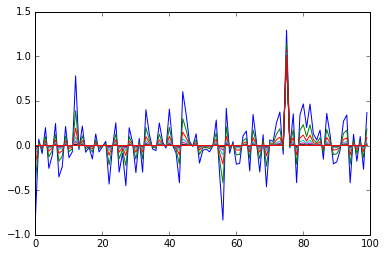

In [10]:
%matplotlib inline
plt.figure()
for i in range(steps):
    plt.plot(Xs[i][800])

In [11]:
!mkdir datasets/gaussians

In [12]:
# Each observation is a class (letter) + id -- Up to 26 classes
# Ex.: a0 -- first observation of the a class 
indices = [string.ascii_lowercase[c]+'-'+str(i%class_size) for i, c in enumerate(y)]
# Column names are f0, f1, ..., f<n_dims-1>
columns = ['f'+str(i) for i in range(dims)]

In [13]:
Xs[0][0]

array([  1.34521204e-01,  -8.84526486e-03,   4.66748967e-01,
         2.04529825e-01,  -1.15212626e-01,  -2.14648257e-01,
        -1.11826947e-01,  -2.34244918e-01,  -2.13460646e-01,
        -4.19900687e-02,   1.95998306e-01,   5.66417201e-01,
         5.40750865e-02,  -5.45705196e-01,   5.08046913e-02,
        -2.71635009e-01,  -6.52760335e-02,   1.54454011e-01,
        -2.65103528e-01,   1.20534559e-01,  -3.13351131e-01,
         3.21881934e-01,   1.08019419e-01,  -3.95564954e-01,
         2.92589978e-01,  -2.86118506e-01,   1.58302645e+00,
         4.82407746e-01,  -4.57118488e-01,   1.19268657e-01,
        -2.23121550e-02,   1.91052074e-01,   1.49306623e-01,
         2.59280614e-01,   2.86982901e-01,  -1.85253459e-01,
         2.96482138e-01,  -8.05141481e-02,   3.07878946e-01,
         6.55485681e-02,   3.47737324e-01,   2.97221523e-01,
         1.91757039e-01,   5.56826725e-04,  -3.13116130e-01,
         5.92102997e-01,  -7.62341630e-02,   1.68691408e-02,
         3.25972624e-01,

In [14]:
dataset_name = 'gaussians'

In [15]:
# Save each revision in a separate csv
for t in range(steps):
    df = pd.DataFrame(Xs[t], index=indices, columns=columns)
    df.to_csv('datasets/gaussians/' + dataset_name + '-' + str(t) + '.csv')

In [16]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
a-0,0.000263,-0.000017,9.116191e-04,0.000399,-0.000225,-0.000419,-0.000218,-0.000458,-0.000417,-8.201185e-05,...,0.000740,0.001163,0.000441,1.410878e-03,0.000966,0.000377,-0.000542,-0.001001,-0.000359,-0.000332
a-1,-0.000961,-0.000034,-1.118704e-03,-0.000390,-0.000573,0.000921,0.000121,-0.000291,0.001119,-1.416934e-03,...,-0.000581,0.000574,-0.000656,-5.474732e-04,0.001187,-0.000284,-0.000673,0.000608,-0.000716,-0.000270
a-2,0.000623,0.000441,-4.496720e-04,0.000519,0.000765,-0.001102,-0.000492,-0.000865,-0.000114,-8.592459e-04,...,-0.000174,0.000346,0.000466,-6.552405e-04,0.000034,-0.000064,-0.000217,0.000364,-0.000913,-0.000879
a-3,-0.000510,0.000484,-1.206960e-04,-0.000781,0.000529,-0.000305,0.000009,-0.000992,0.000100,3.304570e-04,...,0.000136,-0.000293,0.000147,2.505379e-04,0.000185,0.000427,-0.001177,0.000174,-0.001413,-0.000341
a-4,0.000746,-0.000711,9.584579e-05,-0.000390,-0.001122,-0.000116,0.000055,-0.000992,-0.000437,-1.327356e-03,...,-0.000187,-0.000840,-0.001321,2.476317e-04,0.000437,0.000490,-0.000144,0.000531,0.000226,0.000449
a-5,0.000011,-0.001412,-9.133826e-04,-0.000836,-0.000018,-0.001061,-0.000712,0.000581,-0.000635,4.047704e-05,...,0.000617,0.000025,0.000314,1.453497e-04,-0.000528,0.000344,-0.000707,-0.000032,0.000343,-0.000111
a-6,-0.000126,0.000245,6.454771e-04,-0.001033,0.000351,-0.000228,0.000587,-0.000012,0.000086,-8.317848e-04,...,0.000220,0.000355,0.000022,2.716127e-07,0.000100,-0.000863,-0.000628,-0.000673,0.000464,0.000100
a-7,0.000385,0.000525,4.880600e-04,0.000068,0.000666,-0.000014,-0.000288,0.000336,-0.000682,-4.469937e-04,...,-0.000029,-0.000461,-0.000854,-1.775017e-04,-0.001157,-0.000621,-0.000131,-0.000752,0.000099,-0.001059
a-8,0.000135,0.000812,1.742944e-04,-0.000519,-0.000605,0.000168,0.000710,-0.000870,0.000059,-2.910867e-05,...,0.000224,-0.000255,0.000951,1.182367e-03,0.000297,0.000008,0.000750,-0.000355,-0.001311,0.000695
a-9,0.000069,0.000321,-1.302863e-04,-0.000602,0.000432,0.000628,-0.000122,0.000211,-0.000153,9.833067e-04,...,-0.000937,0.000054,0.000583,-6.521124e-04,0.000079,-0.001829,0.001303,0.000359,-0.000454,-0.000177
